In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
np.random.seed(seed=1)
x = 4*np.random.rand(40,1)
print(x.transpose())

[[1.66808802e+00 2.88129797e+00 4.57499269e-04 1.20933029e+00
  5.87023563e-01 3.69354379e-01 7.45040846e-01 1.38224291e+00
  1.58706990e+00 2.15526694e+00 1.67677806e+00 2.74087800e+00
  8.17808999e-01 3.51246975e+00 1.09550373e-01 2.68187004e+00
  1.66921921e+00 2.23475931e+00 5.61547754e-01 7.92405956e-01
  3.20297827e+00 3.87304630e+00 1.25369671e+00 2.76929046e+00
  3.50555661e+00 3.57842665e+00 3.40176845e-01 1.56219133e-01
  6.79321678e-01 3.51257001e+00 3.93387335e-01 1.68443050e+00
  3.83155812e+00 2.13266114e+00 2.76750846e+00 1.26206252e+00
  2.74600371e+00 3.33850269e+00 7.31531094e-02 3.00057726e+00]]


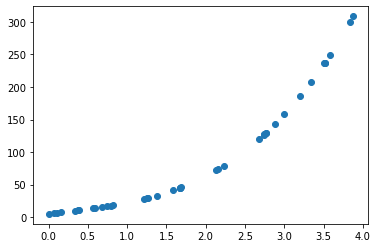

In [3]:
y_gt = 5 + 15 * x - 3*pow(x,2) + 5*pow(x,3) 
plt.figure(1)
plt.scatter(x,y_gt)

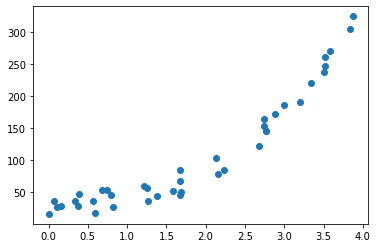

In [4]:
noise  = 40*np.random.rand(40,1)

y = y_gt + noise

plt.figure(2)
plt.scatter(x, y)

In [5]:
# train-test split
x_train = x[:30]
y_train = y[:30]
x_val = x[30:35]
y_val = y[30:35]
x_test = x[35:40]
y_test = y[35:40]

In [6]:
# now we will fit a line based on our analytical solution
# y_hat = mx+b
regr = linear_model.LinearRegression()
x_train = x_train.reshape((30,1))
x_val = x_val.reshape((5,1))
x_test = x_test.reshape((5,1))
regr.fit(x_train, y_train)
m = regr.coef_
b = regr.intercept_
print("Coefficient(s) \n", m)
print("Bias term: \n", b)

Coefficient(s) 
 [[67.59417615]]
Bias term: 
 [-15.31932726]


In [7]:
y_pred_train = regr.predict(x_train)
y_pred_val = regr.predict(x_val) 
y_pred_test = regr.predict(x_test)

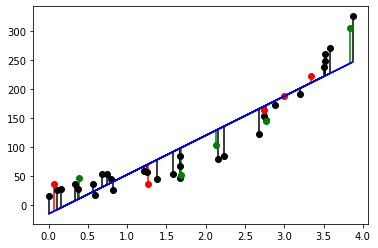

In [8]:
plt.figure(3)
# plot points
plt.plot(x_train, y_train, 'o', color='black');
plt.plot(x_val, y_val, 'o', color='green');
plt.plot(x_test, y_test, 'o', color='red');
# plot fitted line
plt.plot(x_train,y_pred_train,color='blue')
# plot residual lines
plt.vlines(x_train, y_train, y_pred_train, colors='k')
plt.vlines(x_val, y_val, y_pred_val, colors='g')
plt.vlines(x_test, y_test, y_pred_test, colors='r')
plt.show()

In [9]:
err_train = np.sum(np.abs(y_pred_train-y_train))/y_train.shape[0]
print("MAE on training samples: ", err_train)

err_val = np.sum(np.abs(y_pred_val-y_val))/y_val.shape[0]
print("MAE on validation samples: ", err_val)

err_test = np.sum(np.abs(y_pred_test-y_test))/y_test.shape[0]
print("MAE on validation samples: ", err_test)

MAE on training samples:  27.452127737149528
MAE on validation samples:  39.11909433734325
MAE on validation samples:  19.679365674707952


In [10]:
# polynomial fit
# let's start with a quadratic polynomial
p2 = np.poly1d(np.polyfit(np.squeeze(x_train), np.squeeze(y_train), deg=2))
print("Coefficient(s) \n", p2)
y2_pred_train = np.polyval(p2,x_train)
y2_pred_val = np.polyval(p2,x_val)
y2_pred_test = np.polyval(p2,x_test)

Coefficient(s) 
        2
25.04 x - 27.65 x + 38.34


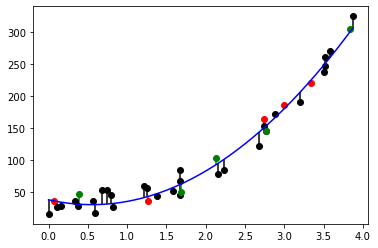

In [11]:
plt.figure(4)
# plot points
plt.plot(x_train, y_train, 'o', color='black');
plt.plot(x_val, y_val, 'o', color='green');
plt.plot(x_test, y_test, 'o', color='red');
# plot fitted line
t = np.linspace(np.min(x), np.max(x), 200)
plt.plot(t, p2(t), '-', color='blue')
# plot residual lines
plt.vlines(x_train, y_train, y2_pred_train, colors='k')
plt.vlines(x_val, y_val, y2_pred_val, colors='g')
plt.vlines(x_test, y_test, y2_pred_test, colors='r')
plt.show()

In [12]:
err_train = np.sum(np.abs(y2_pred_train-y_train))/y_train.shape[0]
print("MAE on training samples for 2nd degree polynomial: ", err_train)

err_val = np.sum(np.abs(y2_pred_val-y_val))/y_val.shape[0]
print("MAE on validation samples for 2nd degree polynomial: ", err_val)

err_test = np.sum(np.abs(y2_pred_test-y_test))/y_test.shape[0]
print("MAE on validation samples for 2nd degree polynomial: ", err_test)

MAE on training samples for 2nd degree polynomial:  11.744664134300466
MAE on validation samples for 2nd degree polynomial:  10.294142335165713
MAE on validation samples for 2nd degree polynomial:  6.1237187738131125


In [13]:
# let's start with a quadratic polynomial
p3 = np.poly1d(np.polyfit(np.squeeze(x_train), np.squeeze(y_train), deg=3))
print("Coefficient(s) \n", p3)
y3_pred_train = np.polyval(p3,x_train)
y3_pred_val = np.polyval(p3,x_val)
y3_pred_test = np.polyval(p3,x_test)

Coefficient(s) 
        3         2
7.178 x - 15.52 x + 31.42 x + 21.7


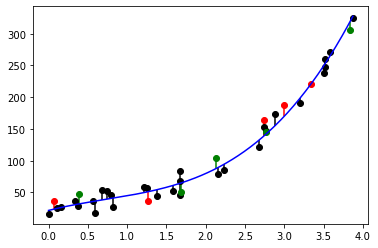

In [14]:
plt.figure(5)
# plot points
plt.plot(x_train, y_train, 'o', color='black');
plt.plot(x_val, y_val, 'o', color='green');
plt.plot(x_test, y_test, 'o', color='red');
# plot fitted line
t = np.linspace(np.min(x), np.max(x), 200)
plt.plot(t, p3(t), '-', color='blue')
# plot residual lines
plt.vlines(x_train, y_train, y3_pred_train, colors='k')
plt.vlines(x_val, y_val, y3_pred_val, colors='g')
plt.vlines(x_test, y_test, y3_pred_test, colors='r')
plt.show()

In [15]:
err_train = np.sum(np.abs(y3_pred_train-y_train))/y_train.shape[0]
print("MAE on training samples for 3rd degree polynomial: ", err_train)

err_val = np.sum(np.abs(y3_pred_val-y_val))/y_val.shape[0]
print("MAE on validation samples for 3rd degree polynomial: ", err_val)

err_test = np.sum(np.abs(y3_pred_test-y_test))/y_test.shape[0]
print("MAE on validation samples for 3rd degree polynomial: ", err_test)

MAE on training samples for 3rd degree polynomial:  8.991775281764115
MAE on validation samples for 3rd degree polynomial:  12.229569687434687
MAE on validation samples for 3rd degree polynomial:  13.996337750489904


In [16]:
# let's start with a 19th degree polynomial
p19 = np.poly1d(np.polyfit(np.squeeze(x_train), np.squeeze(y_train), deg=19))
print("Coefficient(s) \n", p19)
y19_pred_train = np.polyval(p19,x_train)
y19_pred_val = np.polyval(p19,x_val)
y19_pred_test = np.polyval(p19,x_test)

Coefficient(s) 
         19         18        17             16             15
-3.862 x  + 116.4 x  - 1538 x  + 1.141e+04 x  - 4.862e+04 x 
              14             13             12             11
 + 8.419e+04 x  + 3.101e+05 x  - 2.753e+06 x  + 1.033e+07 x 
              10             9             8             7
 - 2.507e+07 x  + 4.292e+07 x - 5.315e+07 x + 4.767e+07 x
              6             5             4             3             2
 - 3.051e+07 x + 1.352e+07 x - 3.954e+06 x + 7.049e+05 x - 6.724e+04 x + 2661 x + 15.07


C:\Users\gorkem\anaconda3\envs\ML\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


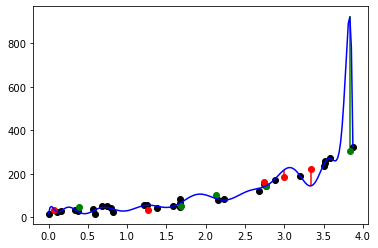

In [17]:
plt.figure(6)
# plot points
plt.plot(x_train, y_train, 'o', color='black');
plt.plot(x_val, y_val, 'o', color='green');
plt.plot(x_test, y_test, 'o', color='red');
# plot fitted line
t = np.linspace(np.min(x), np.max(x), 200)
plt.plot(t, p19(t), '-', color='blue')
# plot residual lines
plt.vlines(x_train, y_train, y19_pred_train, colors='k')
plt.vlines(x_val, y_val, y19_pred_val, colors='g')
plt.vlines(x_test, y_test, y19_pred_test, colors='r')
plt.show()

In [18]:
err_train = np.sum(np.abs(y19_pred_train-y_train))/y_train.shape[0]
print("MAE on training samples for 19th degree polynomial: ", err_train)

err_val = np.sum(np.abs(y19_pred_val-y_val))/y_val.shape[0]
print("MAE on validation samples for 19th degree polynomial: ", err_val)

err_test = np.sum(np.abs(y19_pred_test-y_test))/y_test.shape[0]
print("MAE on validation samples for 19th degree polynomial: ", err_test)

MAE on training samples for 19th degree polynomial:  5.895627010060591
MAE on validation samples for 19th degree polynomial:  135.5981361420823
MAE on validation samples for 19th degree polynomial:  30.58071259912365
